In [1]:
import numpy as np
from graphix import Circuit
import networkx as nx
import matplotlib.pyplot as plt

n = 100
print(f"{n}-qubit GHZ state generation")
circuit = Circuit(n)

# initialize to |0> state.
for i in range(n):
    circuit.h(i)

# GHZ generation
circuit.h(0)
for i in range(1, n):
    circuit.cnot(i - 1, i)

100-qubit GHZ state generation


Number of nodes: 399
Number of edges: 398


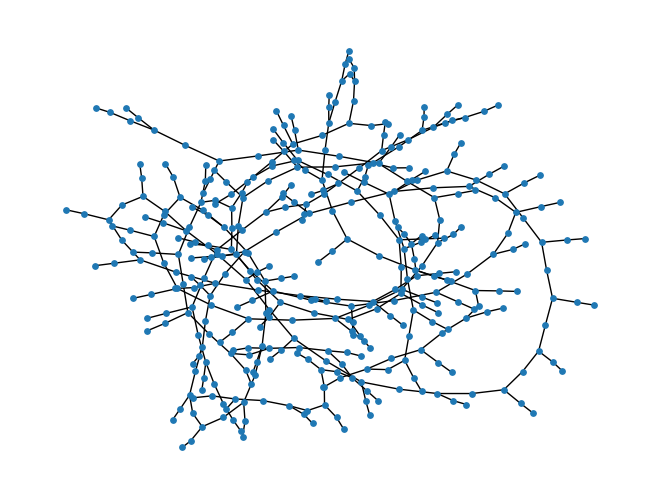

In [2]:
pattern = circuit.transpile()
pattern.standardize()

nodes, edges = pattern.get_graph()
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
print(f"Number of nodes: {len(nodes)}")
print(f"Number of edges: {len(edges)}")
np.random.seed(100)
pos = nx.spring_layout(g)
nx.draw(g, pos=pos, node_size=15)
plt.show()

In [3]:
tn = pattern.simulate_pattern(backend="tensornetwork")
print(f"The amplitude of |00...0>: {tn.get_basis_amplitude(0)}")
print(f"The amplitude of |00...0>: {tn.get_basis_amplitude(2**n-1)}")

The amplitude of |00...0>: 0.499999999999996
The amplitude of |00...0>: 0.49999999999999584
